# Chapter 9
# Exploratory Data Analysis and Diagnosis

In [2]:
import matplotlib
import pandas as pd
import hvplot
import seaborn 

print(f'''
pandas -> {pd.__version__}
matplotlob -> {matplotlib.__version__}
seaborn -> {seaborn.__version__}
hvplot -> {hvplot.__version__}
''')


pandas -> 2.2.3
matplotlob -> 3.9.4
seaborn -> 0.13.2
hvplot -> 0.11.1



In [3]:
import warnings
warnings.filterwarnings('ignore')

## Technical Requirements

In [5]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from statsmodels.datasets import co2, get_rdataset

file = Path('../../datasets/Ch9/closing_price.csv')
closing_price = pd.read_csv(file, 
                            index_col='Date',
                            parse_dates=True)
co2_df = co2.load_pandas().data
#co2_df = co2_df.resample('ME').mean().ffill() #co2_df.ffill()
co2_df = co2_df.ffill()
air_passengers = get_rdataset("AirPassengers")
airp_df = air_passengers.data
airp_df.index = pd.date_range('1949', '1961', freq='ME')
airp_df.drop(columns=['time'], inplace=True)
airp_df.rename(columns={'value':'passengers'}, inplace=True)

# store for future use
(airp_df.reset_index()
        .rename(columns={'index':'date'})
        .to_csv('../../datasets/Ch9/air_passenger.csv', index=False))

(co2_df.reset_index()
        .rename(columns={'index':'date'})
        .to_csv('../../datasets/Ch9/co2.csv', index=False))

In [6]:
###### configurations for image quality#######
plt.rcParams["figure.figsize"] = [12, 5]   ##
# plt.rcParams['figure.dpi'] = 300           ## 300 for printing
# plt.rc('font', size=8)                     ## 
# plt.rc('axes', titlesize=16)               ## 
# plt.rc('axes', labelsize=14)               ##
# plt.rc('xtick', labelsize=10)              ##
# plt.rc('ytick', labelsize=10)              ##
# plt.rc('legend', fontsize=10)              ##
# plt.rc('figure', titlesize=12)             ## 
#############################################

# Recipe 1. Plotting Time Series Data using pandas

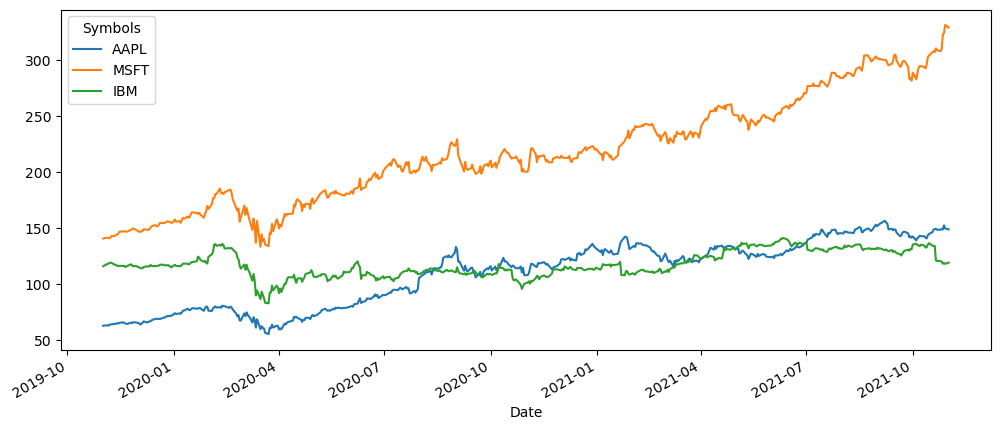

In [82]:
closing_price.plot();

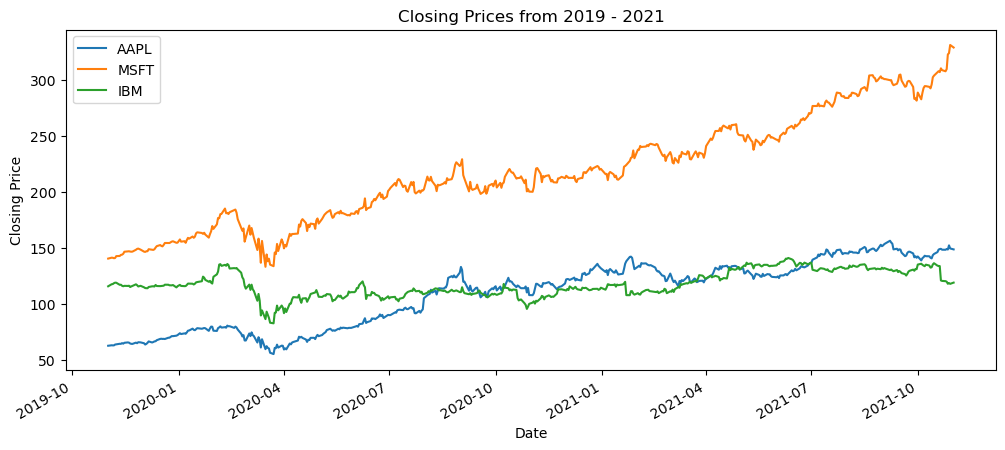

In [63]:
start_date = '2019'
end_date = '2021'
closing_price.plot(
          title=f'Closing Prices from {start_date} - {end_date}',
          ylabel= 'Closing Price');
# plt.savefig('images/fig_9.1.png', bbox_inches='tight')

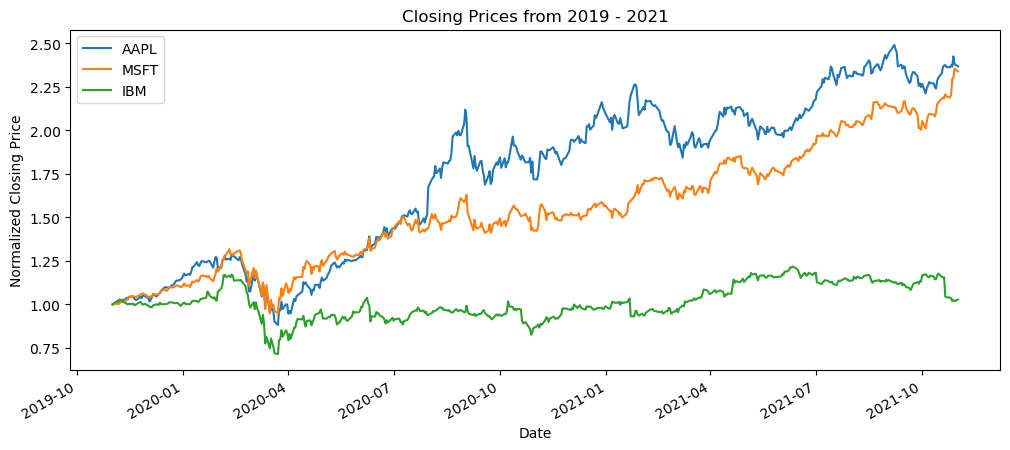

In [65]:
closing_price_n = closing_price.div(closing_price.iloc[0])
closing_price_n.plot(
            title=f'Closing Prices from {start_date} - {end_date}',
            ylabel= 'Normalized Closing Price');
#plt.savefig('images/fig_9.2.png', bbox_inches='tight')

In [69]:
print(closing_price_n.head())

                AAPL      MSFT       IBM
Date                                    
2019-11-01  1.000000  1.000000  1.000000
2019-11-04  1.006567  1.005775  1.015790
2019-11-05  1.005121  1.005149  1.017413
2019-11-06  1.005551  1.002366  1.023980
2019-11-07  1.017156  1.003757  1.027937


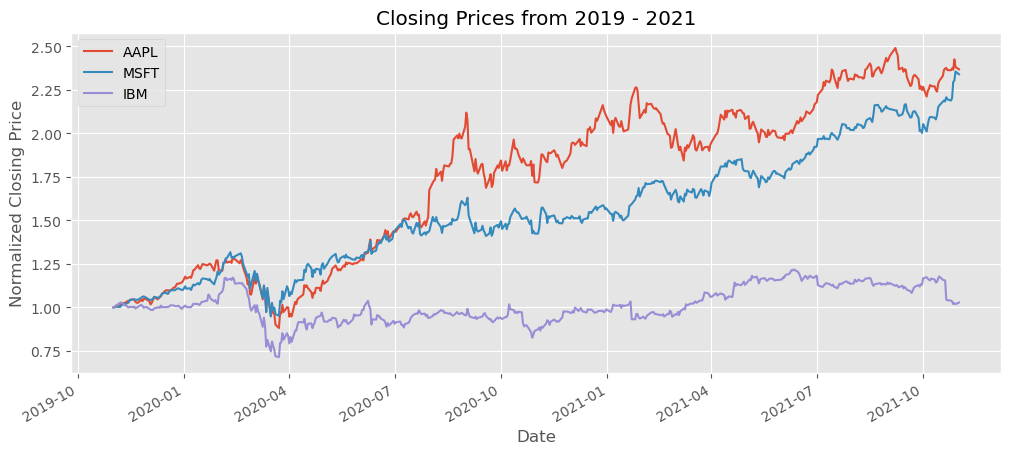

In [10]:
plt.style.use('ggplot')
closing_price_n.plot(
          title=f'Closing Prices from {start_date} - {end_date}',
          ylabel= 'Normalized Closing Price');
#plt.savefig('images/fig_9.4.png', bbox_inches='tight')

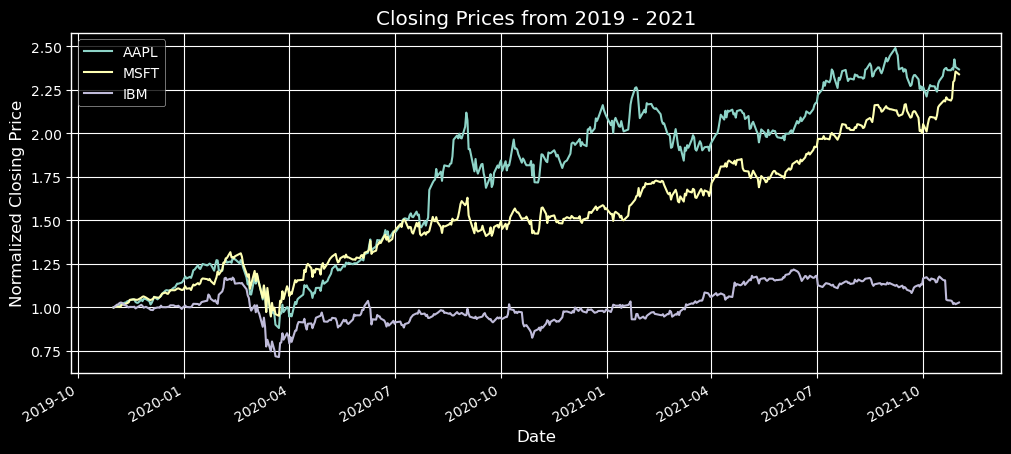

In [11]:
plt.style.use('dark_background')
closing_price_n.plot(
            title=f'Closing Prices from {start_date} - {end_date}',
            ylabel= 'Normalized Closing Price');

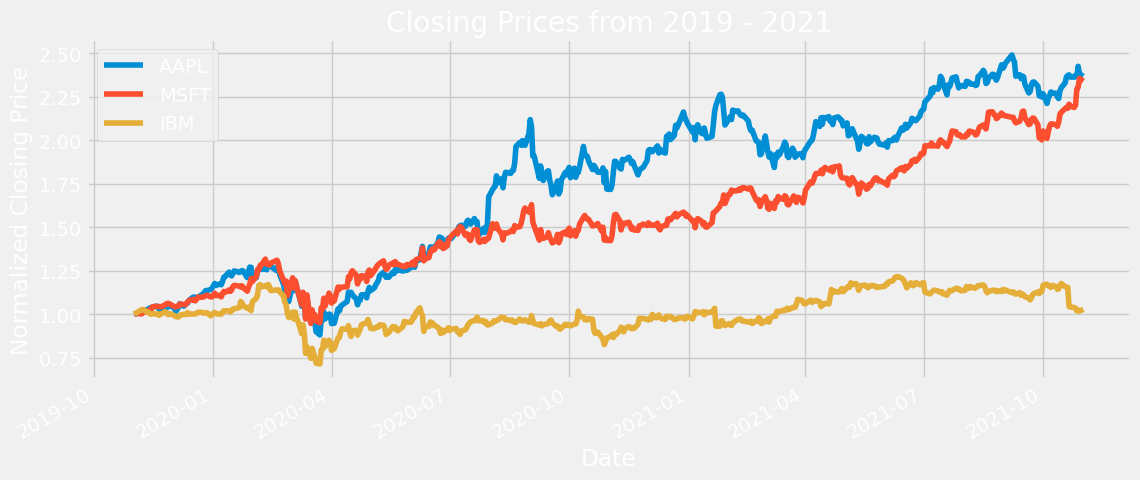

In [12]:
plt.style.use('fivethirtyeight')
closing_price_n.plot(
            title=f'Closing Prices from {start_date} - {end_date}',
            ylabel= 'Normalized Closing Price');

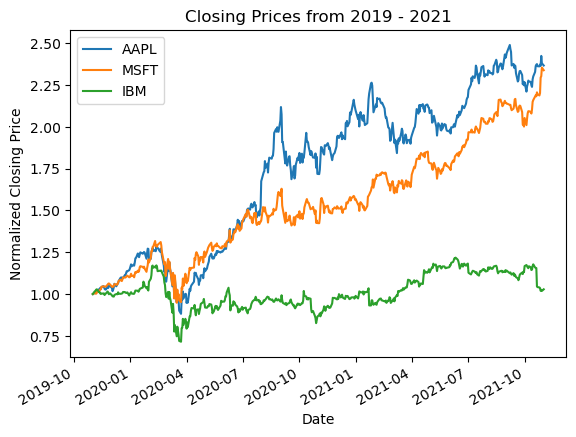

In [25]:
plt.style.use('default')
closing_price_n.plot(
            title=f'Closing Prices from {start_date} - {end_date}',
            ylabel= 'Normalized Closing Price');

In [26]:

# plt.rcParams.update(plt.rcParamsDefault)

###### configurations for image quality#######
plt.rcParams["figure.figsize"] = [12, 5]   ##
# plt.rcParams['figure.dpi'] = 300           ##
# plt.rc('font', size=8)                     ## 
# plt.rc('axes', titlesize=16)               ## 
# plt.rc('axes', labelsize=14)               ##
# plt.rc('xtick', labelsize=10)              ##
# plt.rc('ytick', labelsize=10)              ##
# plt.rc('legend', fontsize=10)              ##
# plt.rc('figure', titlesize=12)             ## 
#############################################

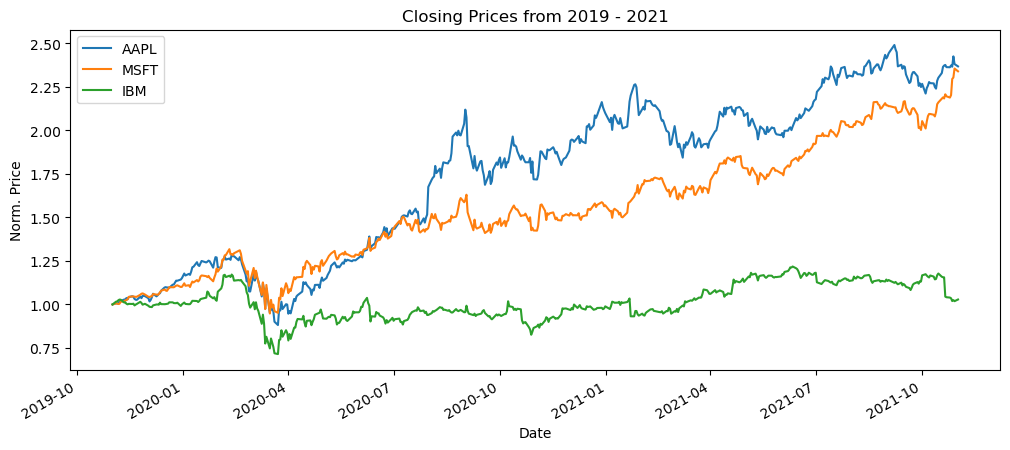

In [31]:
plot = closing_price_n.plot(
            title=f'Closing Prices from {start_date} - {end_date}',
            ylabel= 'Norm. Price')
plot.get_figure().savefig('plot_1.jpg', dpi=300)

## There is more 

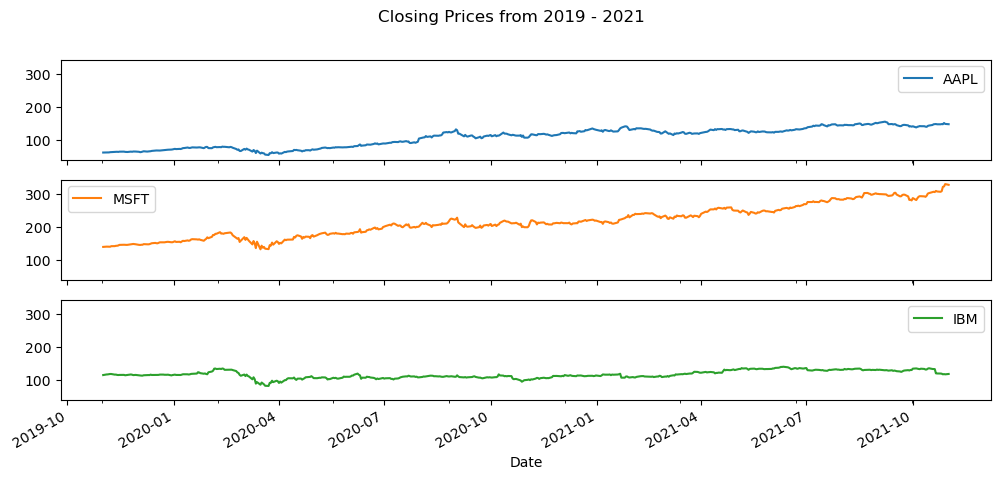

In [35]:
closing_price.plot(
           subplots=True,
           title=f'Closing Prices from {start_date} - {end_date}');
#plt.savefig('images/fig_9.5.png', bbox_inches='tight')

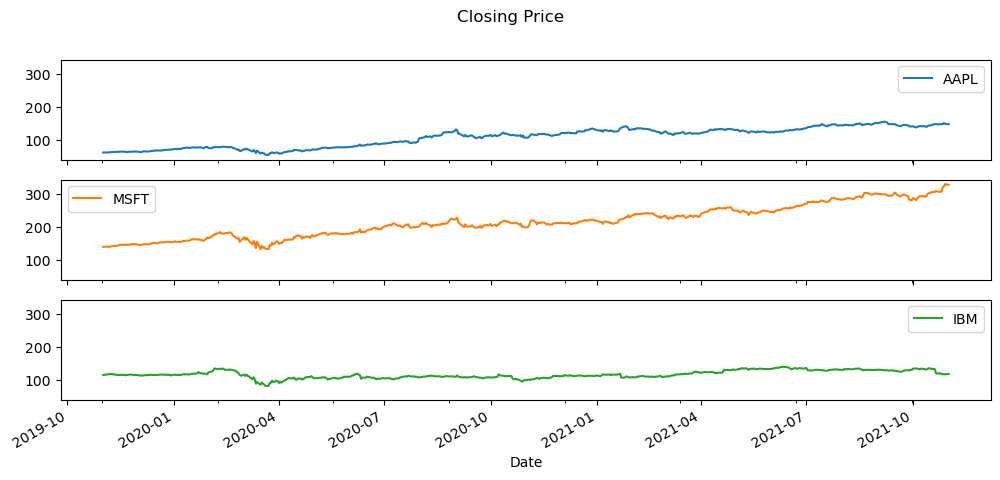

In [38]:
# with sharey = False notice the difference 
plot = closing_price.plot(
            subplots=True,
            sharey=True,
            sharex=True,
            title='Closing Price')

# Recipe 2. Plotting Time Series with Interactive Visualization using hvplot and Plotly Express

In [12]:
import pandas as pd
import hvplot.pandas 

file = Path('../../datasets/Ch9/closing_price.csv')
closing_price = pd.read_csv(file, 
                            index_col='Date',
                            parse_dates=True)

closing_price_n = closing_price.div(closing_price.iloc[0])

In [13]:
closing_price_n.head()

AAPL      MSFT       IBM
Date                                    
2019-11-01  1.000000  1.000000  1.000000
2019-11-04  1.006567  1.005775  1.015790
2019-11-05  1.005121  1.005149  1.017413
2019-11-06  1.005551  1.002366  1.023980
2019-11-07  1.017156  1.003757  1.027937

In [16]:
start_date = '2019'
end_date = '2021'

closing_price_n.hvplot(
    title=f'Closing Prices from {start_date} - {end_date}')

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [18]:
closing_price_n.plot(
    backend='hvplot', 
    title=f'Closing Prices from {start_date} - {end_date}'
)

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [20]:
plot = closing_price_n.plot(backend='hvplot', 
                     title=f'Closing Prices from {start_date} - {end_date}');
plot

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [22]:
closing_price.hvplot(width=300, subplots=True)

:NdLayout   [Variable]
   :Curve   [Date]   (value)

In [24]:
closing_price.hvplot(width=300, subplots=True).cols(2)

:NdLayout   [Variable]
   :Curve   [Date]   (value)

### How it works

<Axes: >

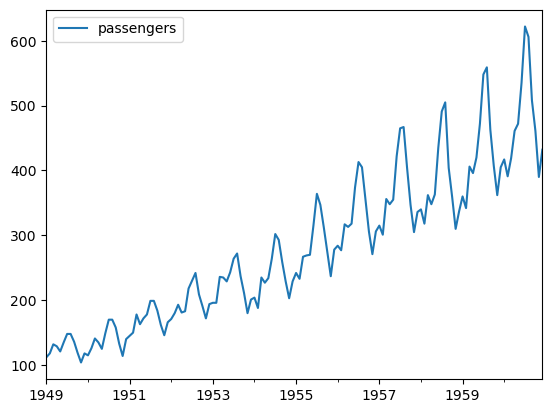

In [47]:
## you can change the backend here for all pandas plots:
## uncomment below to use Hvplot with the default Bokeh backend 

# pd.options.plotting.backend = "hvplot"

## uncomment below to use plotly you will need to install it using conda install plotly or pip install plotly
#pd.options.plotting.backend = "plotly"

## uncomment below to use Matplotlib:
pd.options.plotting.backend = "matplotlib"
airp_df.plot()

In [49]:
hvplot.extension('plotly')
airp_df.hvplot()

/opt/anaconda3/envs/ts-1/lib/python3.13/site-packages/panel/io/notebook.py:201: BokehUserWarning:

out of range integer may result in loss of precision

/opt/anaconda3/envs/ts-1/lib/python3.13/site-packages/panel/io/notebook.py:201: BokehUserWarning:

out of range integer may result in loss of precision



:Curve   [index]   (passengers)

In [59]:
hvplot.extension('bokeh')
airp_df.hvplot()

:Curve   [index]   (passengers)

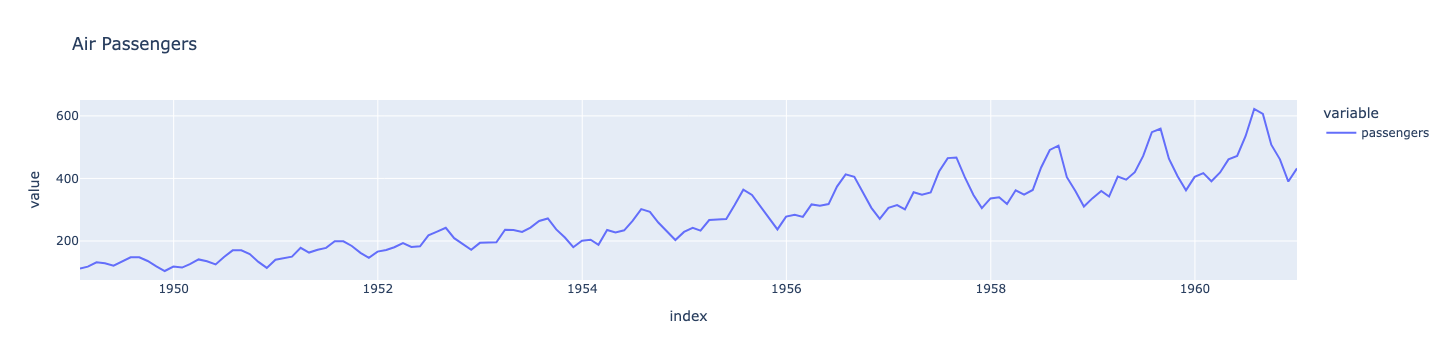

In [61]:
airp_df.plot(
    backend='plotly', 
    title=f'Air Passengers'
)

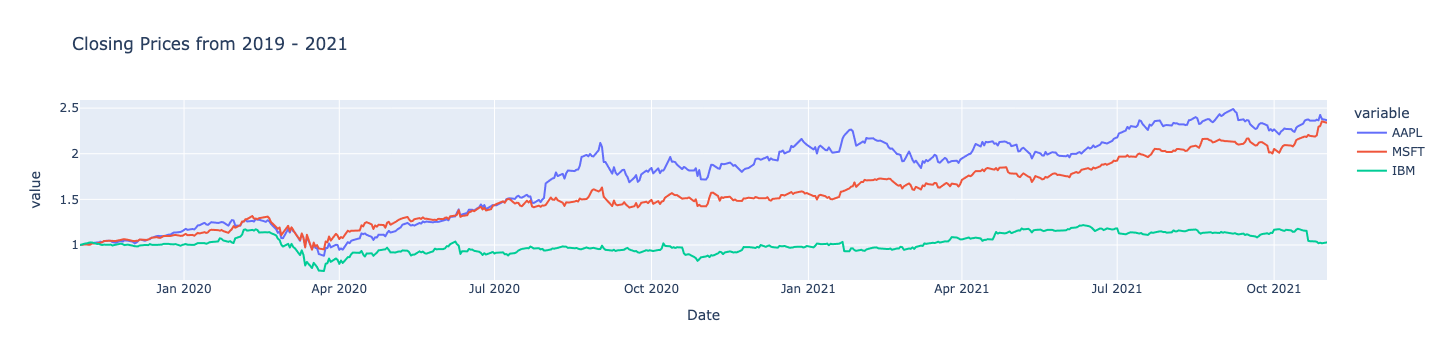

In [63]:
closing_price_n.plot(
    backend='plotly', 
    title=f'Closing Prices from {start_date} - {end_date}'
)

### There is more

In [66]:
closing_price['AAPL'].hvplot.line(by=['index.year'])

:NdOverlay   [index.year]
   :Curve   [Date]   (AAPL)

In [68]:
(closing_price_n['AAPL'].hvplot(width=400) + 
 closing_price_n['MSFT'].hvplot(width=400))

:Layout
   .Curve.AAPL :Curve   [Date]   (AAPL)
   .Curve.MSFT :Curve   [Date]   (MSFT)

In [70]:
(closing_price_n['AAPL'].hvplot(width=500, height=300) * 
 closing_price_n['MSFT'].hvplot()).opts(legend_position='top_left')

:Overlay
   .Curve.AAPL :Curve   [Date]   (AAPL)
   .Curve.MSFT :Curve   [Date]   (MSFT)

In [72]:
(closing_price['AAPL'].hvplot(width=400) + closing_price['MSFT'].hvplot(width=400)) * closing_price['IBM'].hvplot()

:Layout
   .Overlay.I  :Overlay
      .Curve.AAPL :Curve   [Date]   (AAPL)
      .Curve.IBM  :Curve   [Date]   (IBM)
   .Overlay.II :Overlay
      .Curve.MSFT :Curve   [Date]   (MSFT)
      .Curve.IBM  :Curve   [Date]   (IBM)

## Seaborn subplots (optional)

In [87]:
import seaborn as sns
melted_cp = closing_price_n.copy().reset_index().melt(id_vars=['Date'], value_vars=closing_price_n.columns.tolist())
melted_cp.head()

Date Symbols     value
0 2019-11-01    AAPL  1.000000
1 2019-11-04    AAPL  1.006567
2 2019-11-05    AAPL  1.005121
3 2019-11-06    AAPL  1.005551
4 2019-11-07    AAPL  1.017156

In [89]:
closing_price.columns.names = ['Symbols']

<Axes: xlabel='Date'>

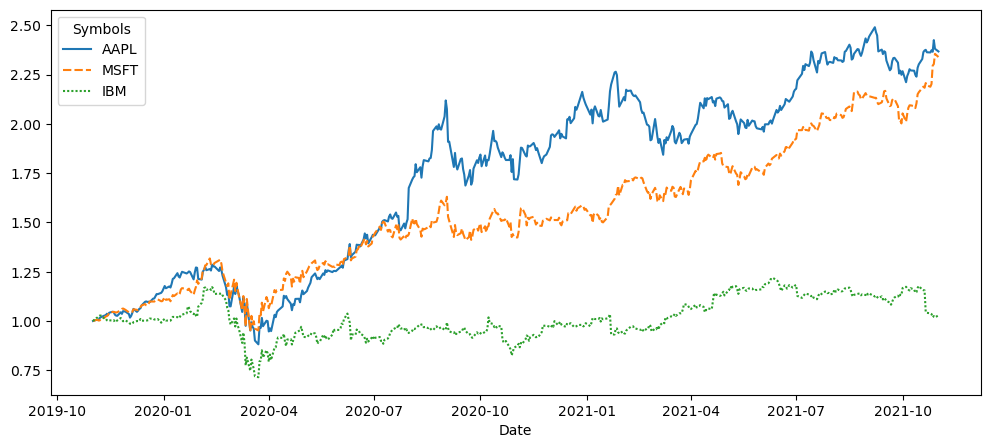

In [91]:
fig, ax = plt.subplots()
sns.lineplot(data=closing_price_n)

# Recipe 3. Decomposing Time Series

In [28]:
import statsmodels
statsmodels.__version__

'0.14.4'

In [30]:
!python --version

Python 3.13.0


In [32]:
import pandas as pd
import statsmodels as sm
from statsmodels.datasets import elec_equip, co2
from statsmodels.tsa.seasonal import seasonal_decompose, STL
import matplotlib.pyplot as plt

In [34]:
###### configurations for image quality#######
plt.rcParams["figure.figsize"] = [10, 5]   ##
# plt.rcParams['figure.dpi'] = 300           ##
# plt.rc('font', size=8)                     ## 
# plt.rc('axes', titlesize=16)               ## 
# plt.rc('axes', labelsize=14)               ##
# plt.rc('xtick', labelsize=10)              ##
# plt.rc('ytick', labelsize=10)              ##
# plt.rc('legend', fontsize=10)              ##
# plt.rc('figure', titlesize=12)             ## 
#############################################

In [36]:
plt.style.use('grayscale')

In [38]:
# write as a CSV dataset for future use
# airp_df.reset_index().rename(columns={'value':'passengers', 'index':'date'}).to_csv('../../datasets/Ch8/air_passenger.csv', index=False)

### Plot the datasets

In [41]:
co2_df.shape

(2284, 1)

In [43]:
co2_df.index

DatetimeIndex(['1958-03-29', '1958-04-05', '1958-04-12', '1958-04-19',
               '1958-04-26', '1958-05-03', '1958-05-10', '1958-05-17',
               '1958-05-24', '1958-05-31',
               ...
               '2001-10-27', '2001-11-03', '2001-11-10', '2001-11-17',
               '2001-11-24', '2001-12-01', '2001-12-08', '2001-12-15',
               '2001-12-22', '2001-12-29'],
              dtype='datetime64[ns]', length=2284, freq='W-SAT')

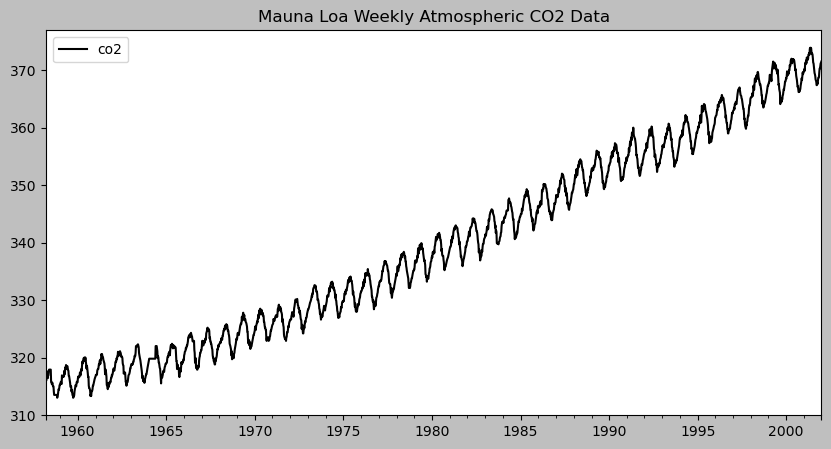

In [45]:
plpt = co2_df.plot(title=co2.TITLE);
#plt.savefig('images/fig_9.12.png', bbox_inches='tight')

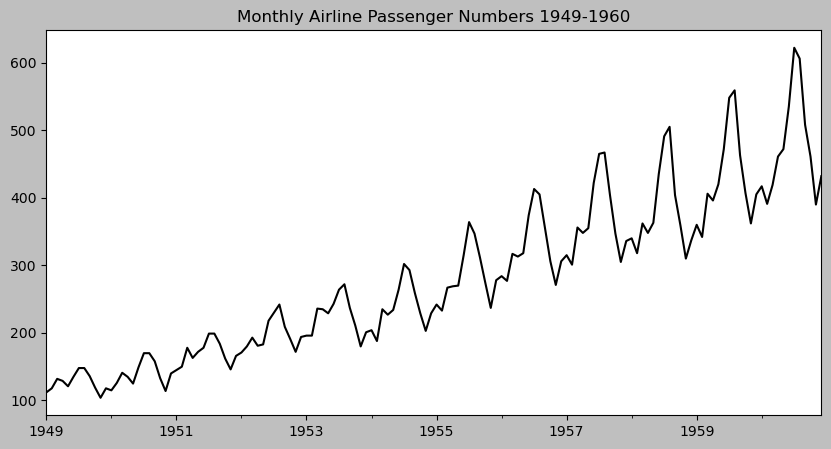

In [47]:
airp_df['passengers'].plot(title=air_passengers['title']);
#plt.savefig('images/fig_9.13.png', bbox_inches='tight')

### Seasonal Decompose

In [50]:
#plt.rcParams["figure.figsize"] = (11,6)
co2_decomposed = seasonal_decompose(co2_df,model='additive')
air_decomposed = seasonal_decompose(airp_df,model='multiplicative')

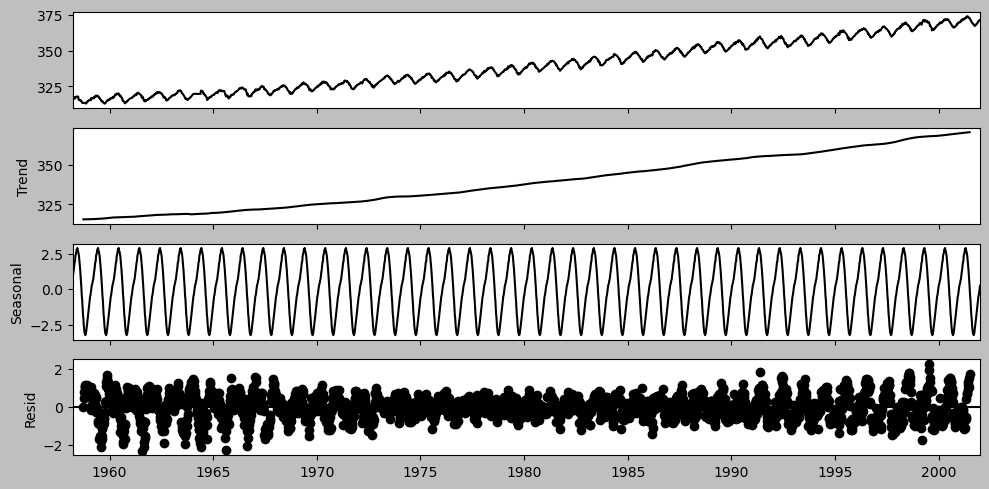

In [52]:
co2_decomposed.plot();
#plt.savefig('images/fig_9.15.png', bbox_inches='tight')

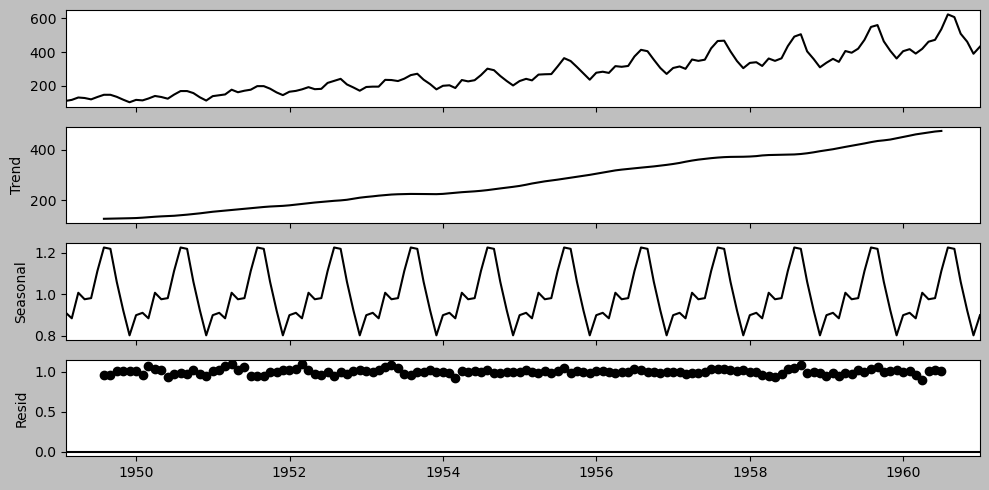

In [54]:
air_decomposed.plot();
#plt.savefig('images/fig_9.14.png', bbox_inches='tight')

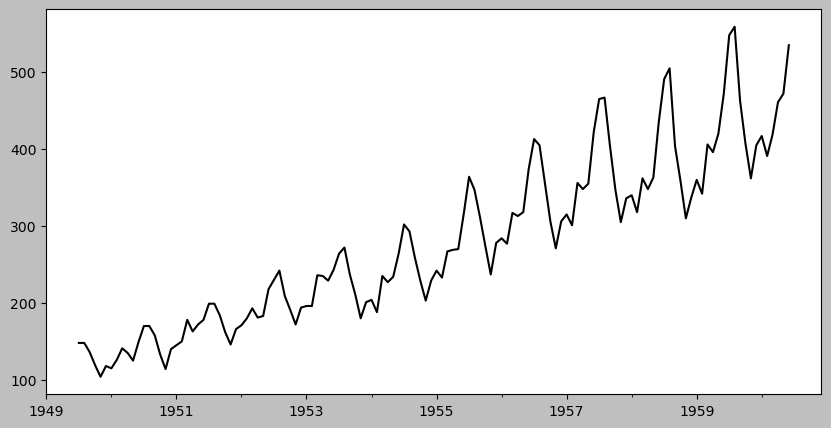

In [56]:
(air_decomposed.trend * 
 air_decomposed.seasonal * 
 air_decomposed.resid).plot();
#plt.savefig('images/fig_9.16.png', bbox_inches='tight')

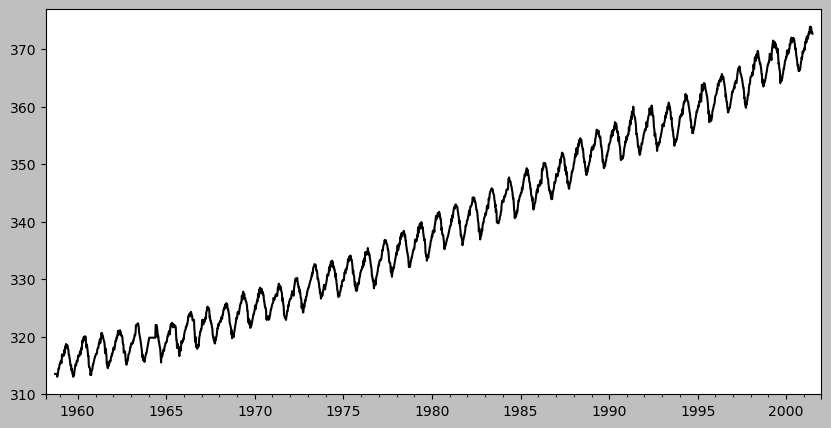

In [58]:
(co2_decomposed.trend +
 co2_decomposed.seasonal + 
 co2_decomposed.resid).plot();


### Using STL

In [61]:
print(co2_df.index.freq)

<Week: weekday=5>


In [63]:
print(airp_df.index.freq)

<MonthEnd>


In [65]:
co2_stl = STL(
    co2_df, 
    seasonal=53, 
    period=52,
    robust=True).fit()

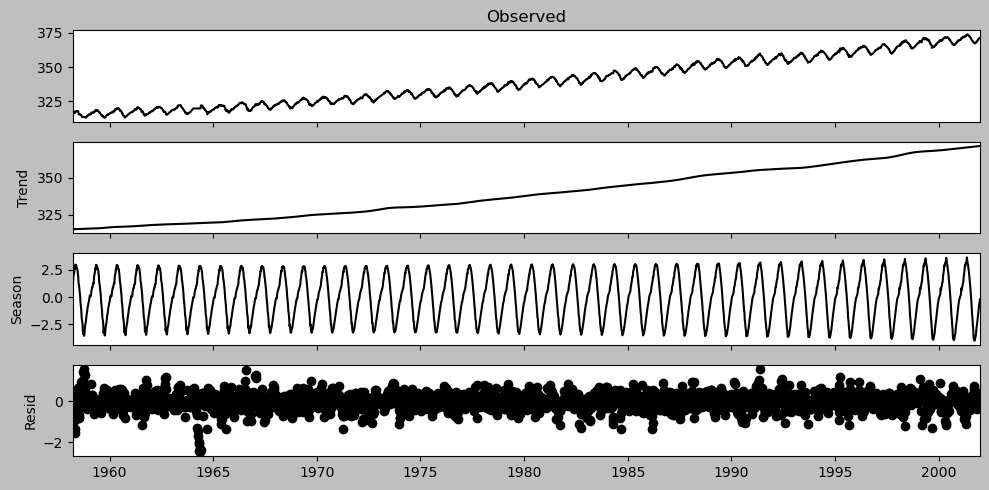

In [67]:
co2_stl.plot();
#plt.savefig('images/fig_9.17.png', bbox_inches='tight')

<Axes: >

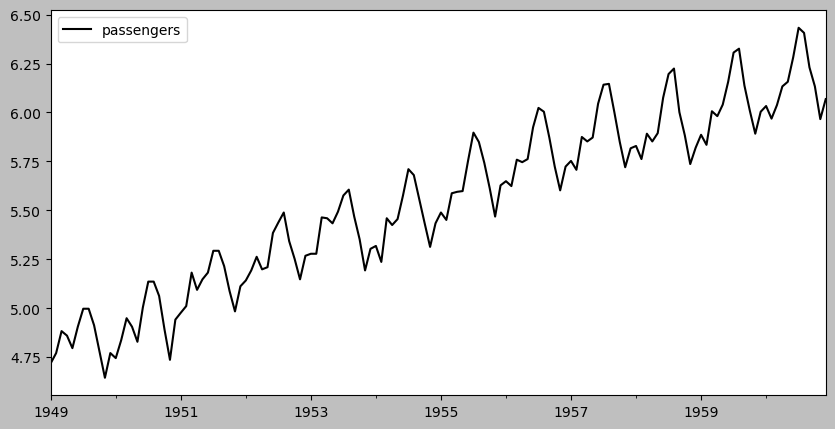

In [75]:
import numpy as np
np.log(airp_df).plot()

In [87]:
import numpy as np
airp_stl = STL(
    np.log(airp_df), 
    period=12,
    seasonal=13, 
    robust=True).fit()

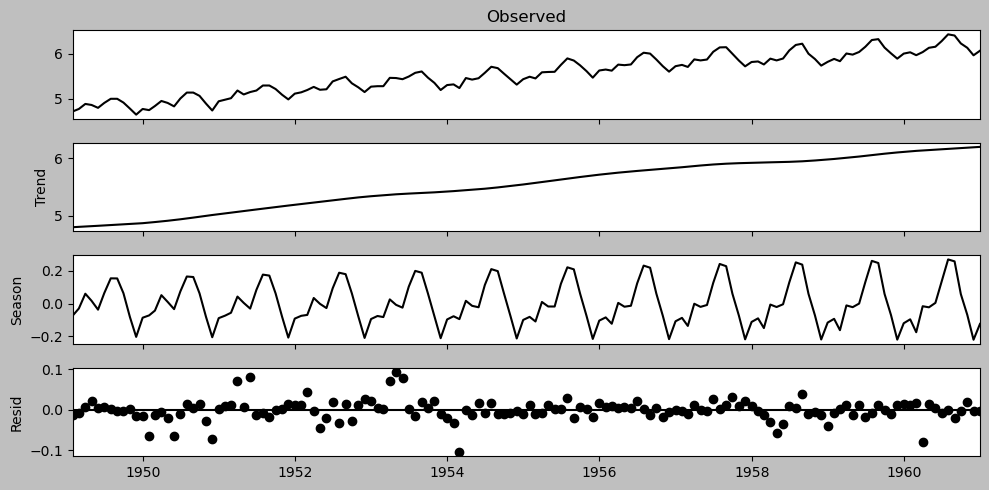

In [79]:
airp_stl.plot();

In [81]:
co2_stl

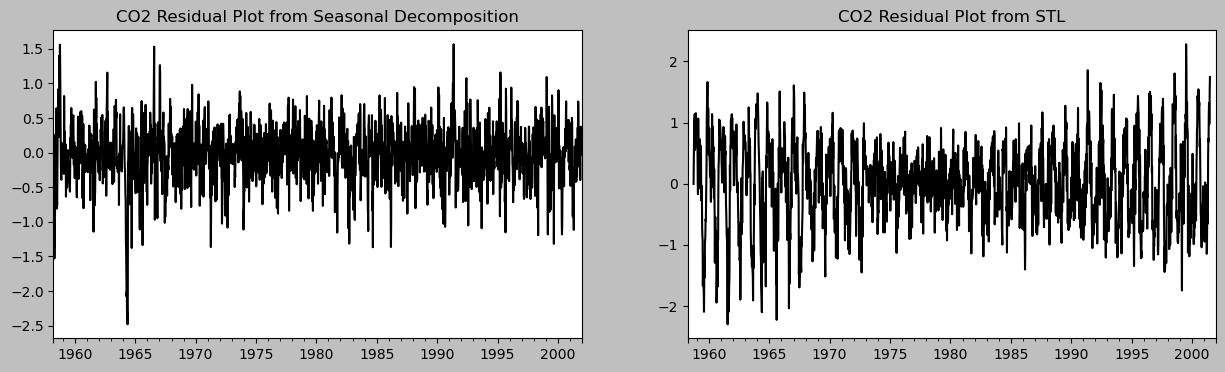

In [83]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 4))
co2_stl.resid.plot(ax=ax1, title='CO2 Residual Plot from Seasonal Decomposition')
co2_decomposed.resid.plot(ax=ax2, title='CO2 Residual Plot from STL');

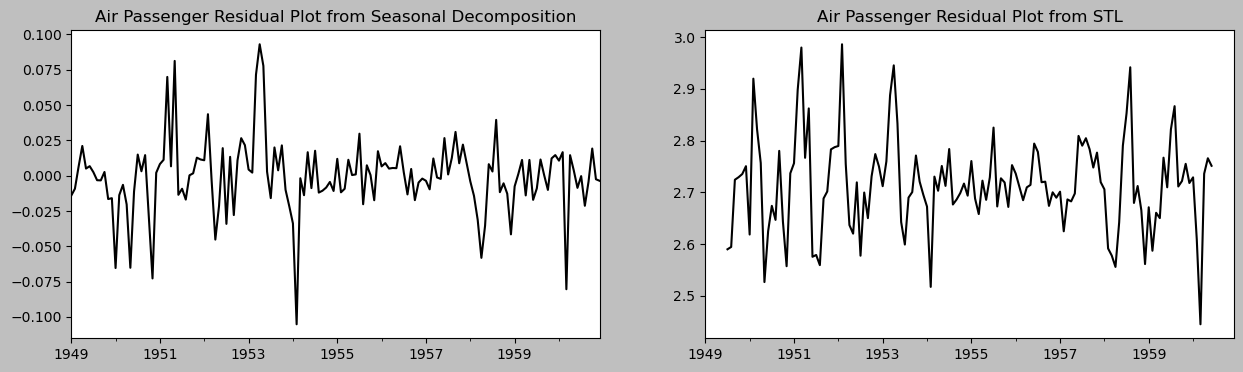

In [89]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 4))
airp_stl.resid.plot(ax=ax1, title='Air Passenger Residual Plot from Seasonal Decomposition')
np.exp(air_decomposed.resid).plot(ax=ax2, title='Air Passenger Residual Plot from STL');

## There is more

In [97]:
# plt.rcParams["figure.figsize"] = (20,3)
from statsmodels.tsa.filters.hp_filter import hpfilter

In [99]:
co2_cyclic, co2_trend = hpfilter(co2_df)

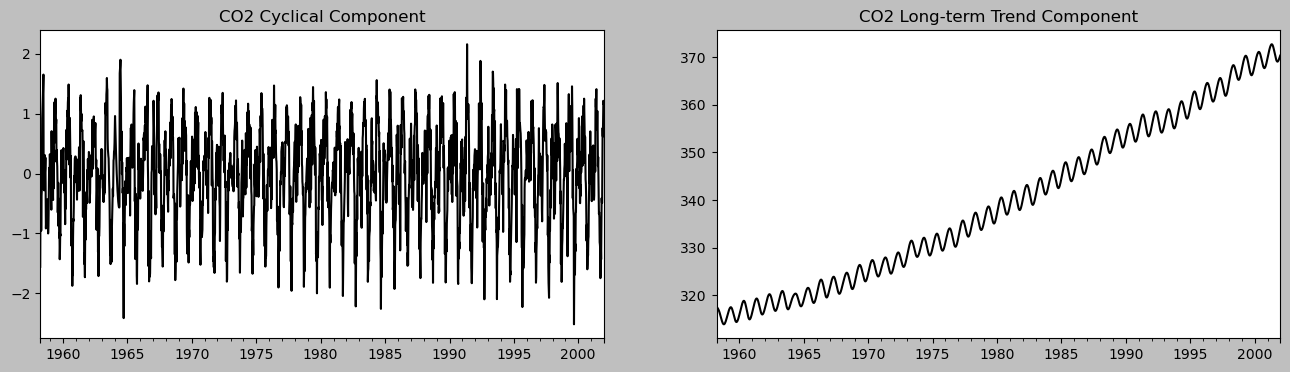

In [123]:
fig, ax = plt.subplots(1,2, figsize=(16, 4))
co2_cyclic.plot(ax=ax[0], title='CO2 Cyclical Component')
co2_trend.plot(ax=ax[1], title='CO2 Long-term Trend Component');

#fig.savefig('images/fig_9.18.png', bbox_inches='tight')

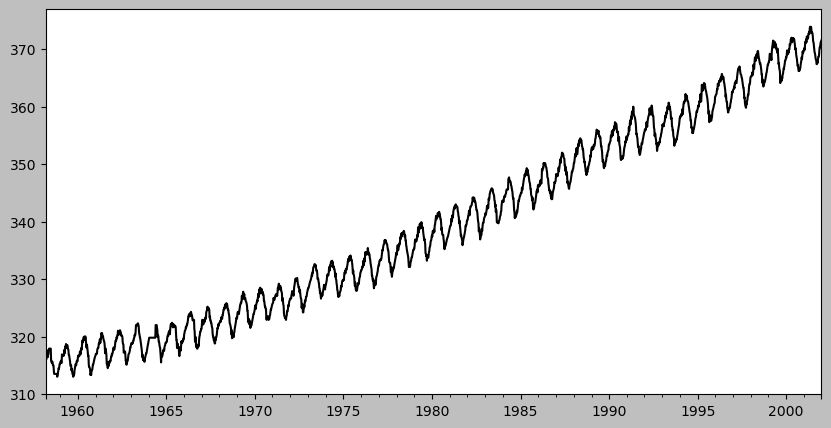

In [103]:
(co2_cyclic + co2_trend).plot();

In [109]:
airp_cyclic, airp_trend = hpfilter(airp_df)

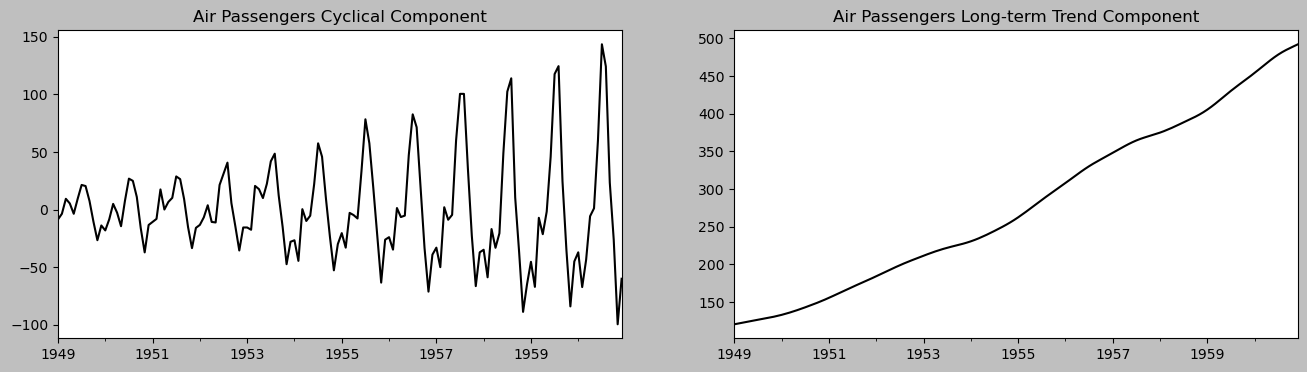

In [125]:
fig, ax = plt.subplots(1,2, figsize=(16, 4))
airp_cyclic.plot(ax=ax[0], title='Air Passengers Cyclical Component')
airp_trend.plot(ax=ax[1], title='Air Passengers Long-term Trend Component');


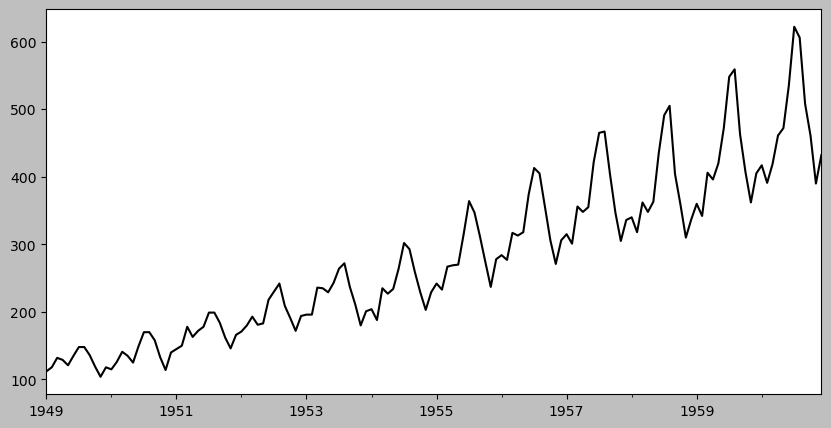

In [119]:
(airp_cyclic + airp_trend).plot();

In [115]:
((airp_cyclic + airp_trend) == airp_df['passengers']).sum()

np.int64(144)

In [117]:
airp_df.shape

(144, 1)

# Recipe 4. Detecting Time Series Stationarity 

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [17]:
plt.style.use('grayscale')

<Axes: title={'center': 'Non-stationary Series'}>

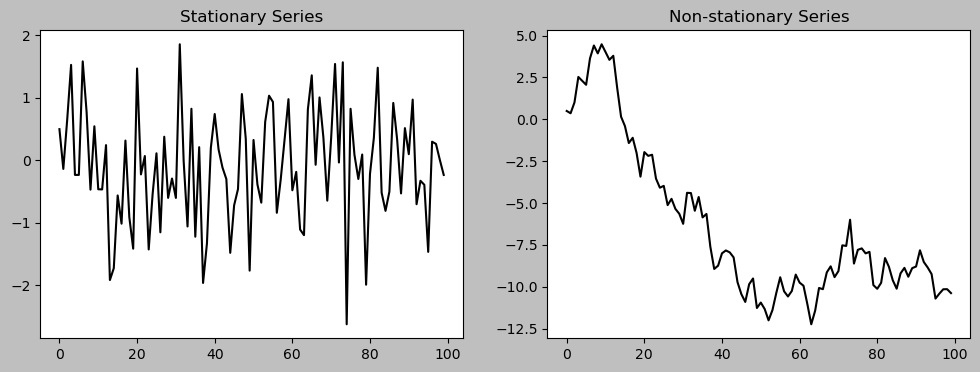

In [19]:
# Example of stationary vs non-stationary series
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
# Stationary series
np.random.seed(42)
stationary = pd.Series(np.random.normal(0, 1, 100))
stationary.plot(ax=ax1, title='Stationary Series')
# Non-stationary series (random walk)
non_stationary = stationary.cumsum()
non_stationary.plot(ax=ax2, title='Non-stationary Series')

In [21]:
plt.style.use('grayscale')

<Axes: >

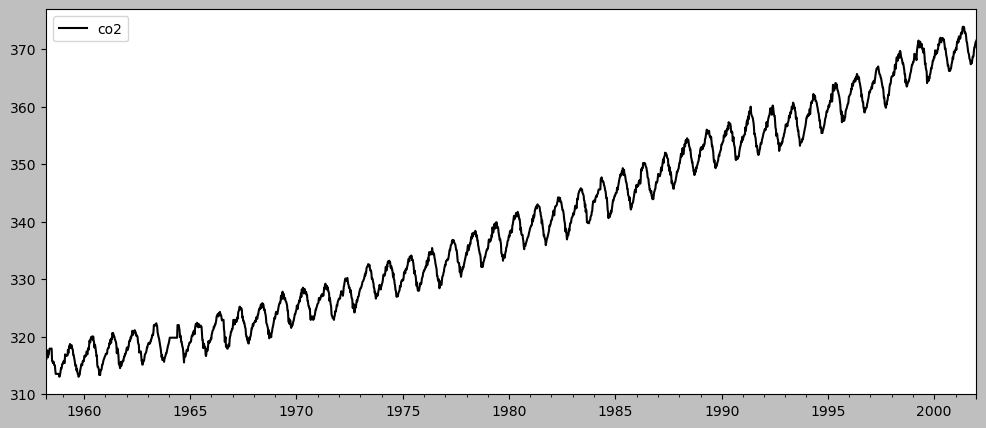

In [23]:
co2_df.plot()

In [25]:
# co2_df.plot(kind='hist')

In [27]:
co2_df.shape

(2284, 1)

In [29]:
# n = co2_df.shape[0]
# lags = int(12*(n/100)**(0.25))

In [31]:
def format_test_results(output, critical_values, decision, test):
    """Format the test results into a pandas Series."""
    output_dict = {
        'Test Statistic': output[0],
        'p-value': output[1],
        'Number of lags': output[2],
        'Decision': decision
    }
    for key, value in critical_values.items():
        output_dict[f"Critical Value ({key})"] = value
    return pd.Series(output_dict, name=test)

def adf_results(data):
    """Perform ADF test and format results."""
    output = adfuller(data)
    decision = "Stationary" if output[1] < 0.05 else "Non-Stationary"
    return format_test_results(output, output[4], decision, test='ADF')

def kpss_results(data):
    """Perform KPSS test and format results."""
    output = kpss(data)
    decision = "Stationary" if output[1] >= 0.05 else "Non-Stationary"
    return format_test_results(output, output[3], decision, test='KPSS')


In [33]:
adf_results(co2_df)

Test Statistic                0.046051
p-value                       0.962179
Number of lags                      27
Decision                Non-Stationary
Critical Value (1%)          -3.433252
Critical Value (5%)          -2.862822
Critical Value (10%)         -2.567452
Name: ADF, dtype: object

In [35]:
kpss_results(co2_df)

/var/folders/48/j6k669vx63qd_68k2_502cl40000gn/T/ipykernel_36144/456072892.py:21: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  output = kpss(data)


Test Statistic                 7.649196
p-value                            0.01
Number of lags                       29
Decision                 Non-Stationary
Critical Value (10%)              0.347
Critical Value (5%)               0.463
Critical Value (2.5%)             0.574
Critical Value (1%)               0.739
Name: KPSS, dtype: object

In [43]:
adf_output = adf_results(co2_df)
kpss_output = kpss_results(co2_df)

/var/folders/48/j6k669vx63qd_68k2_502cl40000gn/T/ipykernel_36144/456072892.py:21: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  output = kpss(data)


In [155]:
print(pd.concat([adf_output, kpss_output], axis=1))

                                  ADF            KPSS
Test Statistic               0.046051        7.649196
p-value                      0.962179            0.01
Number of lags                     27              29
Decision               Non-Stationary  Non-Stationary
Critical Value (1%)         -3.433252           0.739
Critical Value (5%)         -2.862822           0.463
Critical Value (10%)        -2.567452           0.347
Critical Value (2.5%)             NaN           0.574


In [126]:
def check_stationarity(df):
    kps = kpss(df)
    adf = adfuller(df)
    
    kpss_pv, adf_pv = kps[1], adf[1]
    kpssh, adfh = 'Stationary', 'Non-stationary'
    
    if adf_pv < 0.05:
        # Reject ADF Null Hypothesis
        adfh = 'Stationary'
    if kpss_pv < 0.05:
        # Reject KPSS Null Hypothesis
        kpssh = 'Non Stationary'
    return (kpssh, adfh)

In [139]:
import matplotlib.pyplot as plt

def plot_comparison(methods, plot_type='line'):

    n = len(methods) // 2 + len(methods) % 2  # Calculate rows needed for subplots
    fig, ax = plt.subplots(n, 2, sharex=True, figsize=(20, 10))
    ax = ax.flatten()  # Flatten axes array for easier indexing
    
    for i, method in enumerate(methods):
        method.dropna(inplace=True)  # Ensure no NaNs in the data
        # Get the name of the method variable
        name = [n for n in globals() if globals()[n] is method]
        
        # Perform KPSS and ADF tests
        kpss_result = kpss_results(method)
        adf_result = adf_results(method)

        # Extract test statistics and decisions
        kpss_decision = kpss_result['Decision']
        adf_decision = adf_result['Decision']

        # Plot the time series
        method.plot(kind=plot_type, 
                    ax=ax[i], 
                    legend=False, 
                    title=f'Method={name[0]}, KPSS={kpss_decision}, ADF={adf_decision}')
        ax[i].title.set_size(14)

        # Add rolling mean
        method.rolling(52).mean().plot(ax=ax[i], legend=False)

    # Remove any unused axes
    for j in range(i + 1, len(ax)):
        fig.delaxes(ax[j])

    plt.tight_layout()
    plt.show()


In [141]:
# def plot_comparison(methods, plot_type='line'):
#     n = len(methods) // 2
#     fig, ax = plt.subplots(n,2, sharex=True, figsize=(20,10))
#     for i, method in enumerate(methods):
#         method.dropna(inplace=True)
#         name = [n for n in globals() if globals()[n] is method]
#         v, r = i // 2, i % 2

#         kpss_s, adf_s = check_stationarity(method)

#         method.plot(kind=plot_type, 
#                     ax=ax[v,r], 
#                     legend=False, 
#                     title=f'{name[0].upper()} KPSS={kpss_s}, ADF={adf_s}')
#         ax[v,r].title.set_size(14)
#         method.rolling(52).mean().plot(ax=ax[v,r], legend=False)
        

In [149]:
from statsmodels.tsa.seasonal import seasonal_decompose, STL
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.filters.hp_filter import hpfilter

# using first order differencing (detrending)
first_ord_diff = co2_df.diff().dropna()

# using second order differencing
second_ord_diff = co2_df.diff().diff().dropna()

# differencing to remove seasonality
deseasonalize = co2_df.diff(52).dropna()

# using rolling mean 
rolling_mean = co2_df.rolling(window=52).mean()
rolling_mean = co2_df - rolling_mean

# log transform
log_transform = np.log(co2_df)

# using seasonal_decompose to remove trend
decomp = seasonal_decompose(co2_df)
seasonal_decomp = decomp.resid

# using STL
co2_stl = STL(co2_df, seasonal=13,robust=True).fit()
stl_decomp = co2_stl.resid

# using hp_filter 
hp_cyclic, hp_trend = hpfilter(co2_df)

# combine the methods into a list
methods = [first_ord_diff, second_ord_diff, 
           deseasonalize, rolling_mean, 
           log_transform,  seasonal_decomp, 
           stl_decomp, hp_cyclic]

In [151]:
###### configurations for image quality#######
plt.rcParams["figure.figsize"] = [12, 5]   ##
# plt.rcParams['figure.dpi'] = 300           ## 300 for printing
# plt.rc('font', size=8)                     ## 
# plt.rc('axes', titlesize=10)               ## 
# plt.rc('axes', labelsize=12)               ##
# plt.rc('xtick', labelsize=10)              ##
# plt.rc('ytick', labelsize=10)              ##
# plt.rc('legend', fontsize=10)              ##
# plt.rc('figure', titlesize=10)             ## 
#############################################

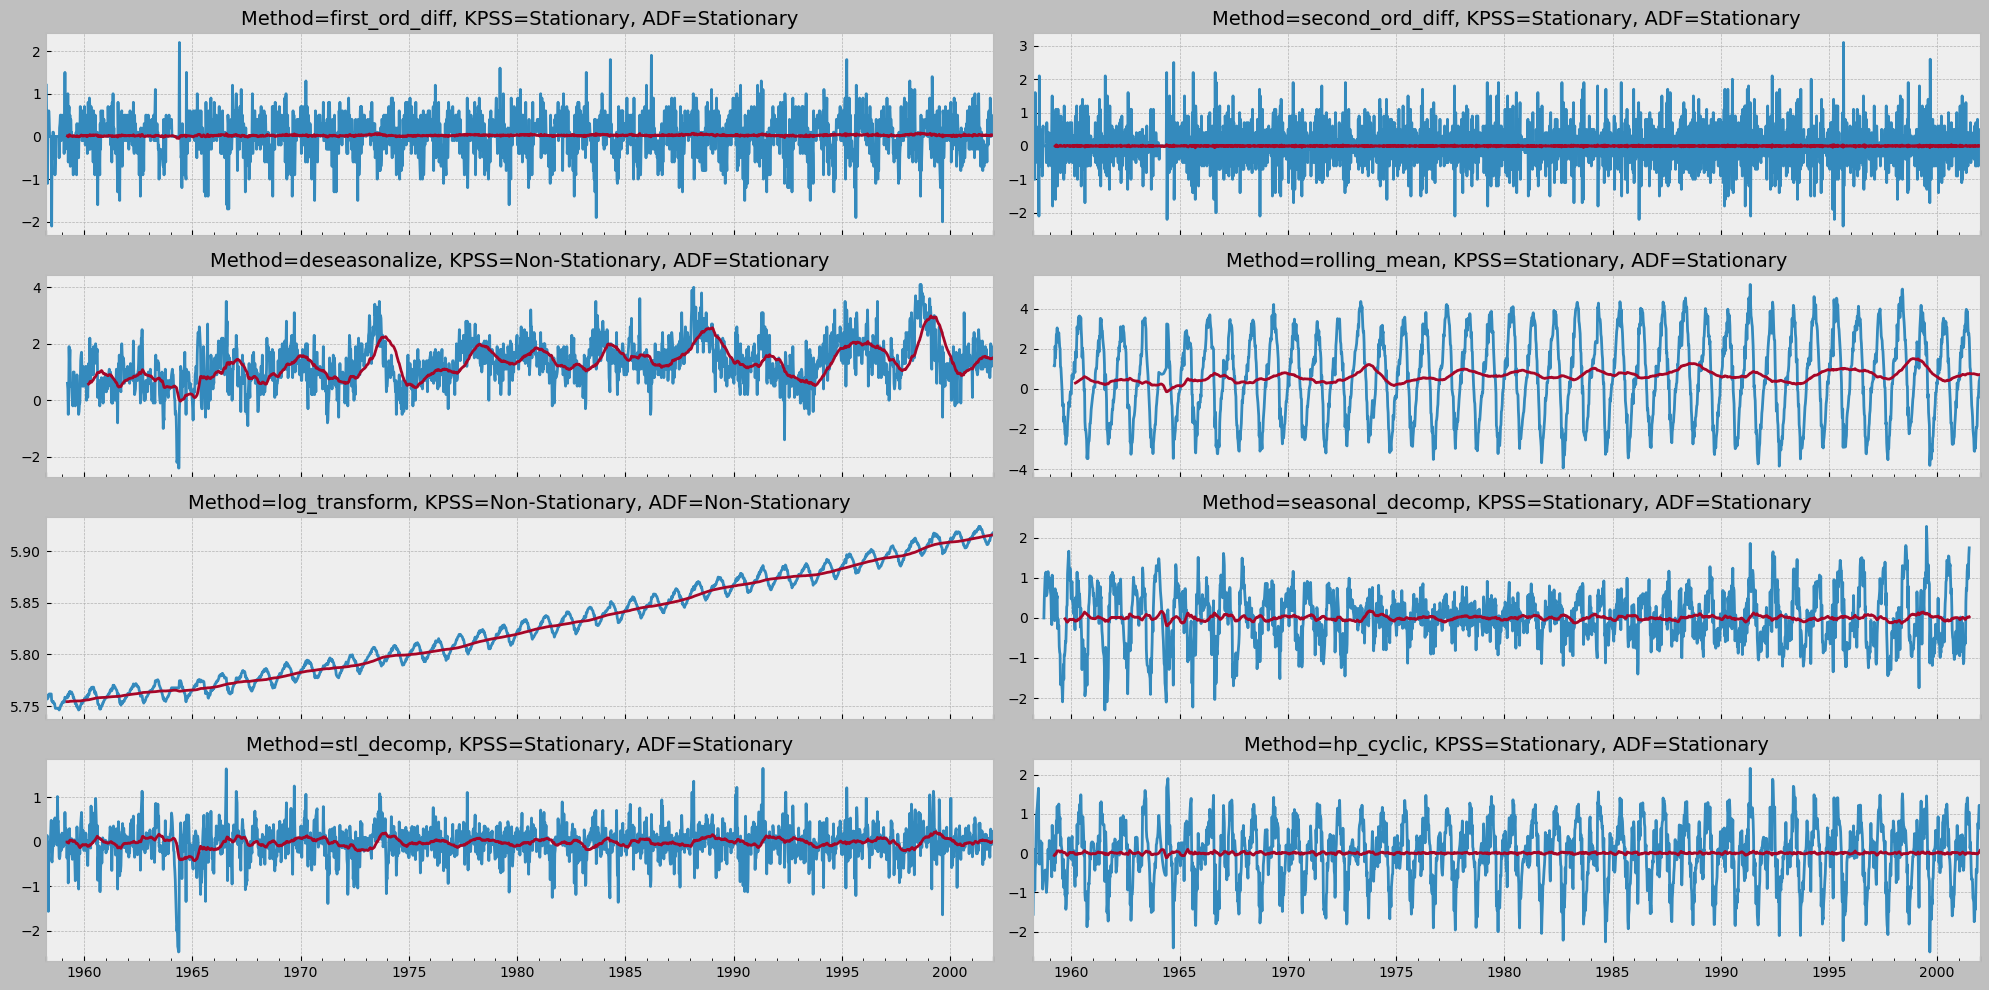

In [153]:
plt.style.use('bmh')
plot = plot_comparison(methods)
warnings.simplefilter(action='ignore')
#plt.savefig('images/fig_9.20.png', bbox_inches='tight')

### There is more

In [147]:
adf_result = adfuller(first_ord_diff, store=True)

In [149]:
adf_result[3]

In [150]:
adf_result[-1].resols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.586
Model:                            OLS   Adj. R-squared:                  0.580
Method:                 Least Squares   F-statistic:                     112.4
Date:                Tue, 20 Feb 2024   Prob (F-statistic):               0.00
Time:                        23:46:08   Log-Likelihood:                -1300.1
No. Observations:                2255   AIC:                             2658.
Df Residuals:                    2226   BIC:                             2824.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -1.2089      0.078    -15.517      0.000      -1.362      -1.056
x2             0.0694      0.074      0.934      0.351      -0.076       0.215
x3             0.0549      0.071      0.771      0.441      -0.085       0.194
x4             0.2661      0.068      3.894      0.000       0.132       0.400
x5             0.4363      0.066      6.603      0.000       0.307       0.566
x6             0.6273      0.064      9.780      0.000       0.502       0.753
x7             0.7159      0.063     11.377      0.000       0.592       0.839
x8             0.8211      0.062     13.246      0.000       0.699       0.943
x9             0.8455      0.061     13.779      0.000       0.725       0.966
x10            0.8269      0.061     13.641      0.000       0.708       0.946
x11            0.7763      0.060     13.011      0.000       0.659       0.893
x12            0.6904      0.058     11.815      0.000       0.576       0.805
x13            0.5949      0.057     10.486      0.000       0.484       0.706
x14            0.4798      0.055      8.736      0.000       0.372       0.588
x15            0.3971      0.053      7.466      0.000       0.293       0.501
x16            0.3136      0.052      6.074      0.000       0.212       0.415
x17            0.2572      0.050      5.096      0.000       0.158       0.356
x18            0.2521      0.050      5.082      0.000       0.155       0.349
x19            0.2443      0.049      4.982      0.000       0.148       0.341
x20            0.2534      0.049      5.211      0.000       0.158       0.349
x21            0.2867      0.048      5.940      0.000       0.192       0.381
x22            0.3286      0.048      6.864      0.000       0.235       0.422
x23            0.3501      0.047      7.426      0.000       0.258       0.443
x24            0.3452      0.046      7.504      0.000       0.255       0.435
x25            0.3440      0.044      7.904      0.000       0.259       0.429
x26            0.2724      0.039      6.924      0.000       0.195       0.350
x27            0.1844      0.032      5.846      0.000       0.123       0.246
x28            0.0940      0.021      4.493      0.000       0.053       0.135
const          0.0299      0.009      3.201      0.001       0.012       0.048
==============================================================================
Omnibus:                       57.058   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              131.961
Skew:                           0.023   Prob(JB):                     2.21e-29
Kurtosis:                       4.184   Cond. No.                         27.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is co

In [151]:
adf_result = adfuller(co2_df ,store=True)
adf_result[-1].resols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.235
Model:                            OLS   Adj. R-squared:                  0.225
Method:                 Least Squares   F-statistic:                     24.42
Date:                Tue, 20 Feb 2024   Prob (F-statistic):          1.63e-108
Time:                        23:46:12   Log-Likelihood:                -1310.4
No. Observations:                2256   AIC:                             2679.
Df Residuals:                    2227   BIC:                             2845.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          2.512e-05      0.001      0.046      0.963      -0.001       0.001
x2            -0.1320      0.021     -6.248      0.000      -0.173      -0.091
x3            -0.0062      0.021     -0.294      0.769      -0.048       0.035
x4             0.2200      0.021     10.403      0.000       0.178       0.261
x5             0.1717      0.022      7.932      0.000       0.129       0.214
x6             0.1930      0.022      8.799      0.000       0.150       0.236
x7             0.0872      0.022      3.911      0.000       0.044       0.131
x8             0.1022      0.022      4.569      0.000       0.058       0.146
x9             0.0212      0.022      0.944      0.345      -0.023       0.065
x10           -0.0200      0.022     -0.891      0.373      -0.064       0.024
x11           -0.0504      0.022     -2.244      0.025      -0.094      -0.006
x12           -0.0858      0.022     -3.816      0.000      -0.130      -0.042
x13           -0.0909      0.023     -4.034      0.000      -0.135      -0.047
x14           -0.1077      0.023     -4.774      0.000      -0.152      -0.063
x15           -0.0753      0.022     -3.350      0.001      -0.119      -0.031
x16           -0.0725      0.022     -3.238      0.001      -0.116      -0.029
x17           -0.0481      0.022     -2.149      0.032      -0.092      -0.004
x18            0.0024      0.022      0.109      0.913      -0.041       0.046
x19           -0.0042      0.022     -0.187      0.852      -0.048       0.040
x20            0.0103      0.022      0.461      0.645      -0.033       0.054
x21            0.0307      0.022      1.378      0.168      -0.013       0.074
x22            0.0327      0.022      1.474      0.140      -0.011       0.076
x23            0.0134      0.022      0.604      0.546      -0.030       0.057
x24           -0.0227      0.022     -1.042      0.298      -0.065       0.020
x25           -0.0169      0.021     -0.789      0.430      -0.059       0.025
x26           -0.0914      0.021     -4.354      0.000      -0.133      -0.050
x27           -0.0875      0.021     -4.154      0.000      -0.129      -0.046
x28           -0.0781      0.021     -3.726      0.000      -0.119      -0.037
const          0.0187      0.185      0.101      0.919      -0.345       0.382
==============================================================================
Omnibus:                       56.964   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              130.100
Skew:                           0.046   Prob(JB):                     5.61e-29
Kurtosis:                       4.173   Cond. No.                     6.89e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is co

# Recipe 5. Applying Power Transformations to Time Series Data

In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import shapiro, boxcox
from statsmodels.stats.api import (het_breuschpagan, 
                                   het_goldfeldquandt, 
                                   het_white, jarque_bera,
                                   omni_normtest, normal_ad)
from statsmodels.stats.diagnostic import kstest_normal, normal_ad
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.formula.api import ols
from statsmodels.tools.tools import add_constant

In [157]:
# plt.rcParams["figure.figsize"] = (20,8)

### Testing for Normality

In [158]:
from scipy.stats import shapiro, kstest, normaltest
from statsmodels.stats.diagnostic import kstest_normal, normal_ad

In [159]:
def is_normal(test, p_level=0.05):
    stat, pval = test
    return 'Normal' if pval > 0.05 else 'Not Normal'

<Axes: >

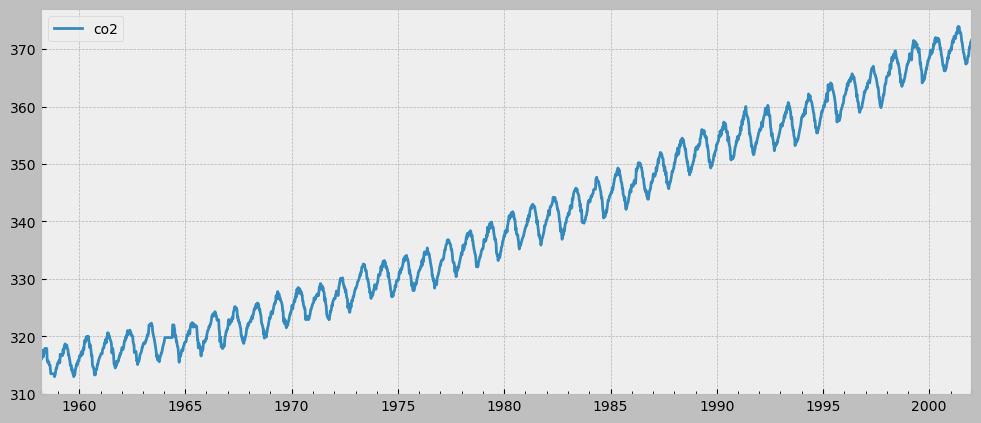

In [258]:
plt.style.use('bmh')
co2_df.plot()

In [259]:
normal_args = (np.mean(co2_df),np.std(co2_df))

print(is_normal(shapiro(co2_df)))
print(is_normal(normaltest(co2_df)))
print(is_normal(normal_ad(co2_df)))
print(is_normal(kstest_normal(co2_df)))
print(is_normal(kstest(co2_df, 
                   cdf='norm', 
                   args=normal_args)))

Not Normal
Not Normal
Not Normal
Not Normal
Not Normal


array([[<Axes: title={'center': 'co2'}>]], dtype=object)

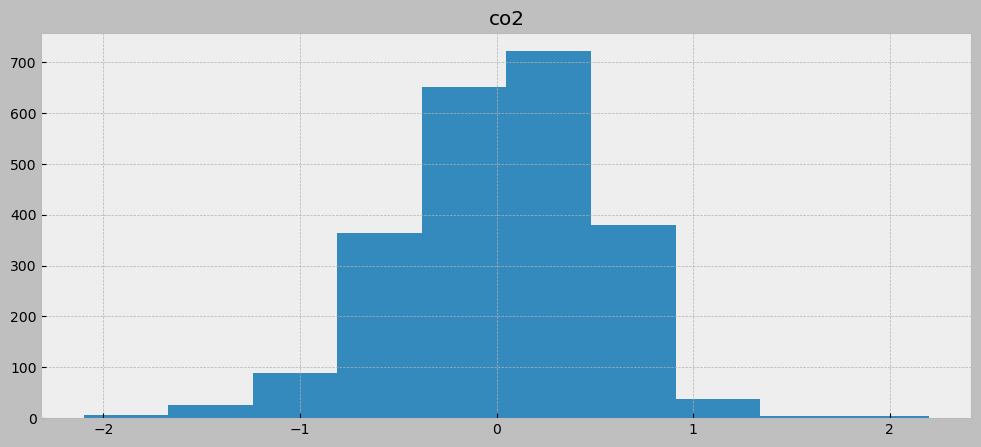

In [260]:
co2_df.diff().hist()

In [261]:
# from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.ar_model import AutoReg

model = AutoReg(co2_df.dropna(), lags=1, trend='n').fit()

In [262]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                    co2   No. Observations:                 2284
Model:                     AutoReg(1)   Log Likelihood               -1637.977
Method:               Conditional MLE   S.D. of innovations              0.496
Date:                Wed, 21 Feb 2024   AIC                           3279.954
Time:                        00:02:04   BIC                           3291.420
Sample:                    04-05-1958   HQIC                          3284.136
                         - 12-29-2001                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
co2.L1         1.0001   3.05e-05   3.28e+04      0.000       1.000       1.000
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.9999           +0.0000j            0.9999            0.0000
-----------------------------------------------------------------------------
"""

In [263]:
print(is_normal(shapiro(model.resid)))
print(is_normal(normaltest(model.resid)))
print(is_normal(normal_ad(model.resid)))
print(is_normal(kstest_normal(model.resid)))
print(is_normal(kstest(model.resid, 
                   cdf='norm', 
                   args=(np.mean(model.resid), np.std(model.resid)))))

Not Normal
Not Normal
Not Normal
Not Normal
Not Normal


(array([  6.,  25.,  89., 365., 651., 721., 380.,  37.,   5.,   4.]),
 array([-2.12259531, -1.69260882, -1.26262232, -0.83263583, -0.40264933,
         0.02733717,  0.45732366,  0.88731016,  1.31729665,  1.74728315,
         2.17726964]),
 <BarContainer object of 10 artists>)

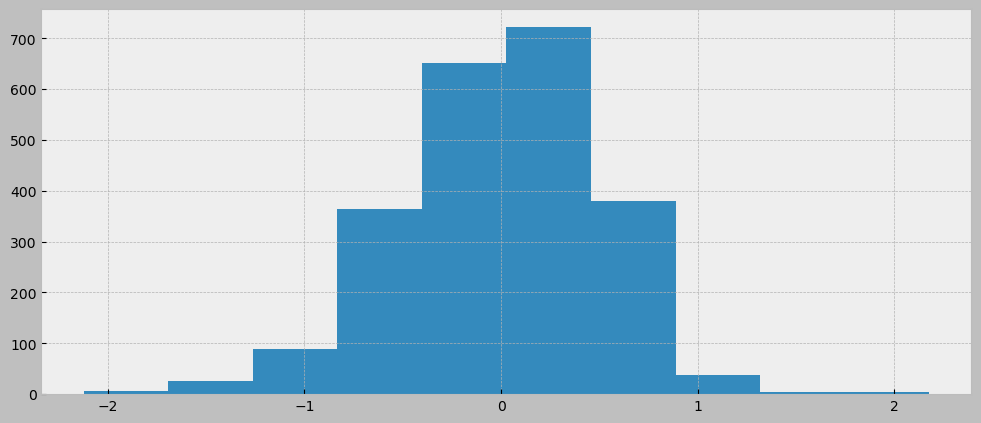

In [264]:
plt.hist(model.resid)

In [265]:
model.resid.mean()

0.00012627220500625733

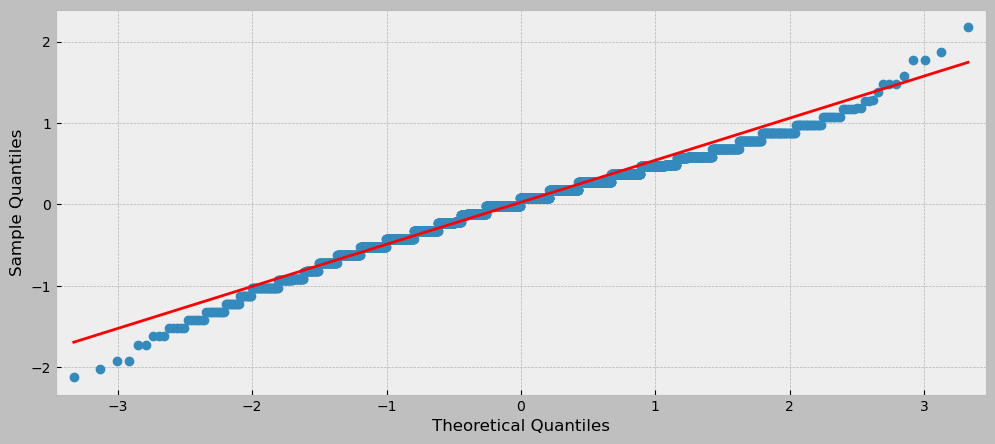

In [266]:
from statsmodels.graphics.gofplots import qqplot
qqplot(model.resid, line='q');

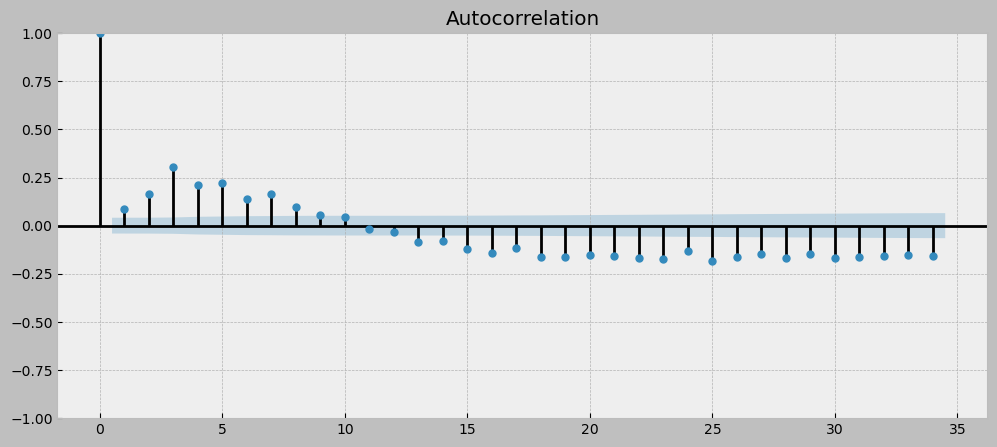

In [267]:
plot_acf(model.resid);plt.show()

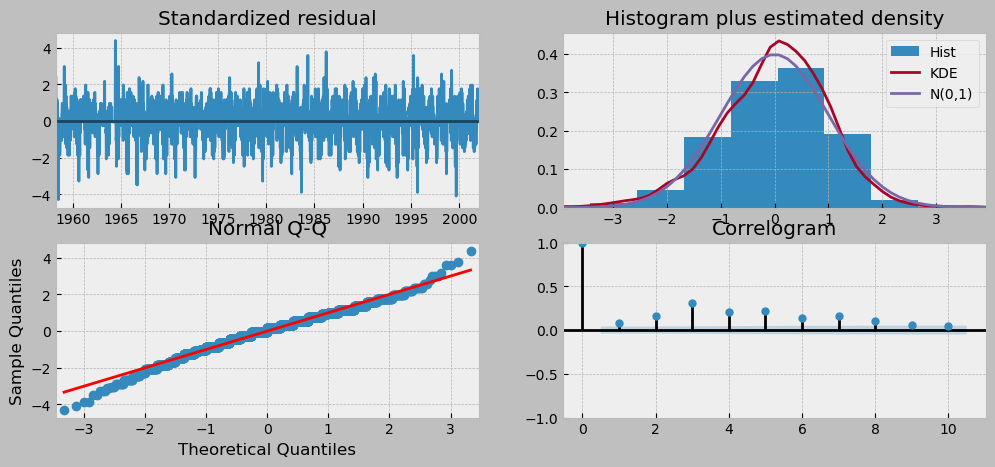

In [268]:
model.plot_diagnostics();plt.show()

In [269]:
model.test_normality()

Jarque-Bera    1.194972e+02
P-value        1.125935e-26
Skewness      -3.395637e-01
Kurtosis       3.891627e+00
dtype: float64

In [270]:
model.test_heteroskedasticity()

ARCH-LM   P-value  DF
Lag                         
1     0.590650  0.442168   1
2     2.754957  0.252214   2
3    27.651645  0.000004   3
4    26.480304  0.000025   4
5    30.254785  0.000013   5
6    30.505528  0.000031   6
7    30.480297  0.000078   7
8    30.775329  0.000154   8
9    30.865914  0.000312   9
10   32.014526  0.000398  10

### Testing Homoskedactiticy

In [271]:
from statsmodels.stats.api import (het_breuschpagan, 
                                   het_white)

In [272]:
model.resid

1958-04-05    1.177533
1958-04-12    0.277447
1958-04-19   -0.122574
1958-04-26   -1.122567
1958-05-03    0.477511
                ...   
2001-12-01   -0.026320
2001-12-08    0.473680
2001-12-15    0.373645
2001-12-22    0.073616
2001-12-29    0.173609
Freq: W-SAT, Length: 2283, dtype: float64

In [273]:
model.fittedvalues.shape
model.resid.shape

(2283,)

In [274]:
model.fittedvalues

1958-04-05    316.122467
1958-04-12    317.322553
1958-04-19    317.622574
1958-04-26    317.522567
1958-05-03    316.422489
                 ...    
2001-12-01    370.326320
2001-12-08    370.326320
2001-12-15    370.826355
2001-12-22    371.226384
2001-12-29    371.326391
Freq: W-SAT, Length: 2283, dtype: float64

In [275]:
def het_test(model, test=het_breuschpagan):
    lm, lm_pvalue, fvalue, f_pvalue = (
        het_breuschpagan(model.resid, 
                         add_constant(
                             model.fittedvalues)
                        ))
    
    return "Heteroskedastic" if f_pvalue < 0.05 else "Homoskedastic"

In [276]:
het_test(model, test=het_breuschpagan)

'Homoskedastic'

In [277]:
het_test(model, test=het_white)

'Homoskedastic'

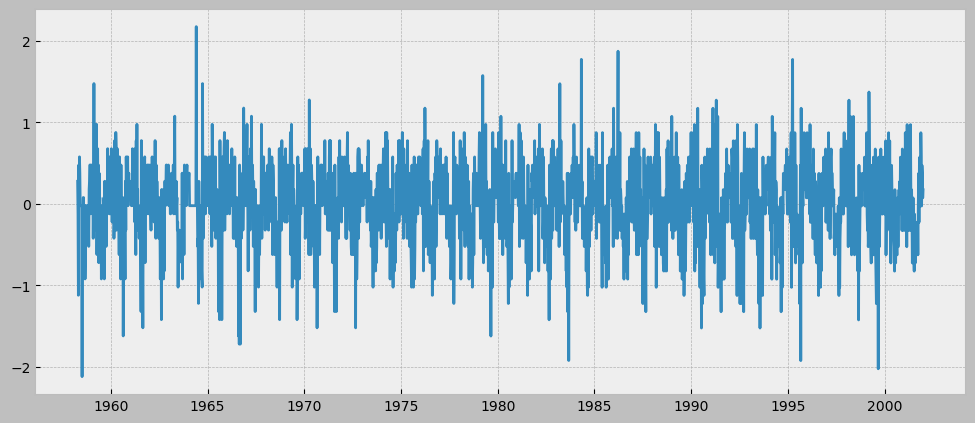

In [278]:
plt.plot(model.resid[1:])

### Box-Cox Transformation

In [279]:
from scipy.stats import boxcox

In [280]:
airp_df

value
1949-01-31    112
1949-02-28    118
1949-03-31    132
1949-04-30    129
1949-05-31    121
...           ...
1960-08-31    606
1960-09-30    508
1960-10-31    461
1960-11-30    390
1960-12-31    432

[144 rows x 1 columns]

In [281]:
xt, lmbda = boxcox(airp_df['value'])

In [282]:
xts = pd.Series(xt, index=airp_df.index)

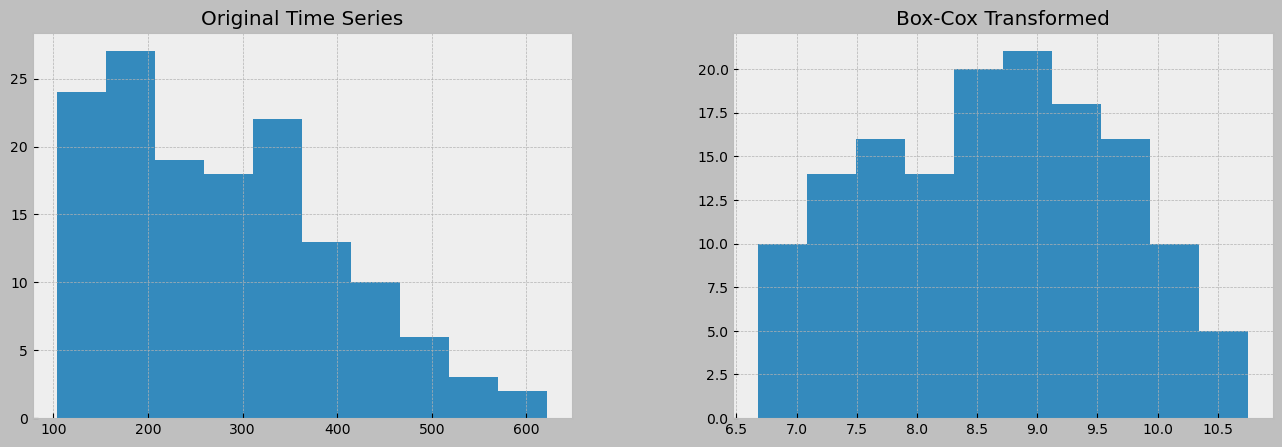

In [283]:
fig, ax = plt.subplots(1, 2, figsize=(16,5))
airp_df.hist(ax=ax[0])
ax[0].set_title('Original Time Series')
xts.hist(ax=ax[1])
ax[1].set_title('Box-Cox Transformed');
# plt.savefig('images/fig_9.23.png', bbox_inches='tight')

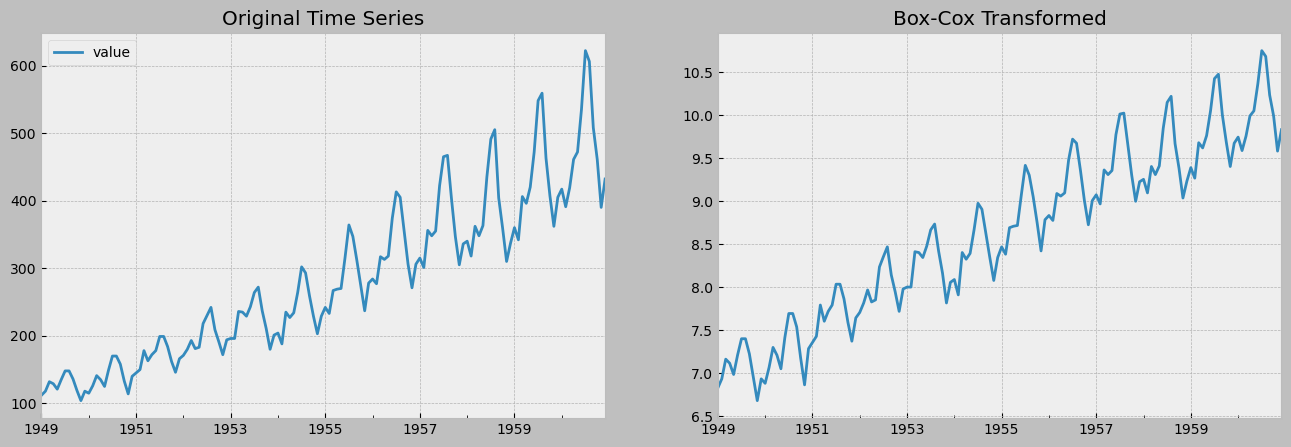

In [287]:
fig, ax = plt.subplots(1, 2, figsize=(16,5))
airp_df.plot(ax=ax[0])
ax[0].set_title('Original Time Series')
xts.plot(ax=ax[1])
ax[1].set_title('Box-Cox Transformed');
#plt.savefig('images/fig_9.24.png', bbox_inches='tight')

In [288]:
model_airp = AutoReg(airp_df, lags=1, trend='n').fit()
model_bx = AutoReg(xts, lags=1, trend='n').fit()

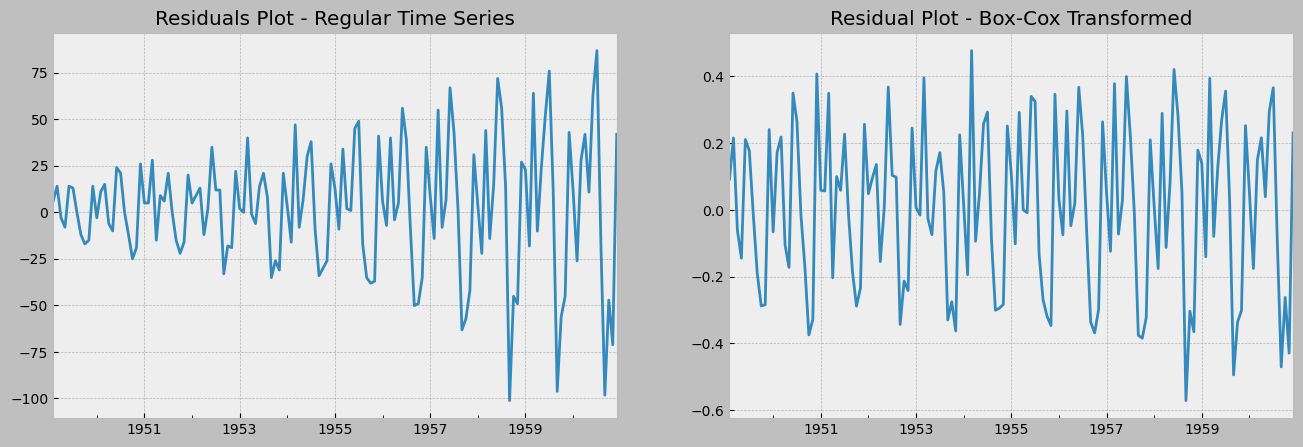

In [289]:
fig, ax = plt.subplots(1, 2, figsize=(16,5))
model_airp.resid.plot(ax=ax[0])
ax[0].set_title('Residuals Plot - Regular Time Series')
model_bx.resid.plot(ax=ax[1])
ax[1].set_title('Residual Plot - Box-Cox Transformed');
#plt.savefig('images/fig_9.25.png', bbox_inches='tight')

### There is more

In [290]:
print(model_bx.diagnostic_summary())

             Test of Normality              
Jarque-Bera    P-value   Skewness   Kurtosis
--------------------------------------------
      5.987      0.050     -0.128      2.031


    Test of Conditional Homoskedasticity   
       Lag    ARCH-LM    P-value         DF
-------------------------------------------
         1      0.116      0.733          1
         2      1.243      0.537          2
         3      4.112      0.250          3
         4      4.058      0.398          4
         5      6.836      0.233          5
         6      7.203      0.302          6
         7     14.755      0.039          7
         8     15.157      0.056          8
         9     15.993      0.067          9
        10     17.963      0.056         10
-------------------------------------------


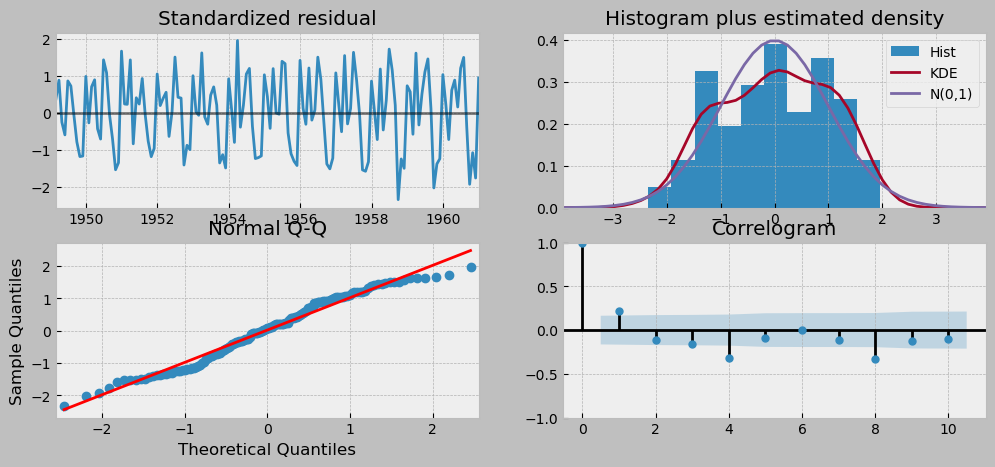

In [292]:
model_bx.plot_diagnostics();
#plt.savefig('images/fig_9.27.png', bbox_inches='tight')


# Recipe 6. Testing for Autocorrelation

In [293]:
from statsmodels.stats.diagnostic import acorr_ljungbox

In [294]:
co2_diff = co2_df.diff().dropna()

In [295]:
acorr_ljungbox(co2_diff, lags=10, return_df=True)

lb_stat      lb_pvalue
1    16.465996   4.953050e-05
2    79.094659   6.680563e-18
3   290.951900   9.035108e-63
4   390.520507   3.107289e-83
5   502.638658  2.151267e-106
6   546.194148  9.337537e-115
7   608.250032  4.072029e-127
8   630.709764  5.827742e-131
9   637.510409  1.851867e-131
10  641.806647  1.923859e-131

### There is more

In [296]:
acorr_ljungbox(model_bx.resid, return_df=True, lags=10)

lb_stat     lb_pvalue
1    6.891378  8.661248e-03
2    8.799865  1.227817e-02
3   12.728605  5.261831e-03
4   28.039694  1.224400e-05
5   29.201880  2.116596e-05
6   29.204900  5.563813e-05
7   31.021142  6.161813e-05
8   47.991783  9.915325e-08
9   50.468157  8.794755e-08
10  52.247451  1.026842e-07